In [11]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from numpy import sqrt,floor
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import random
import math as mt
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft
from scipy.fft import fft, fftfreq

In [12]:
def linear (x,a,b):
    return a*x+b

# Calibration of measuring instruments

## Calibration at gain = 7

In [13]:
z0 = np.loadtxt("z3000.txt", usecols = 2, unpack = True, skiprows=10)
z1 = np.loadtxt("z3100.txt", usecols = 2, unpack = True, skiprows=10)
z2 = np.loadtxt("z3200.txt", usecols = 2, unpack = True, skiprows=10)
z3 = np.loadtxt("z3300.txt", usecols = 2, unpack = True, skiprows=10)
z4 = np.loadtxt("z3400.txt", usecols = 2, unpack = True, skiprows=10)
z5 = np.loadtxt("z3500.txt", usecols = 2, unpack = True, skiprows=10)
z6 = np.loadtxt("z3600.txt", usecols = 2, unpack = True, skiprows=10)
z7 = np.loadtxt("z3700.txt", usecols = 2, unpack = True, skiprows=11)
z8 = np.loadtxt("z3800.txt", usecols = 2, unpack = True, skiprows=10)
z9 = np.loadtxt("z3900.txt", usecols = 2, unpack = True, skiprows=10)
z10 = np.loadtxt("z4000.txt", usecols = 2, unpack = True, skiprows=10)
z11 = np.loadtxt("z4100.txt", usecols = 2, unpack = True, skiprows=10)
z12 = np.loadtxt("z4200.txt", usecols = 2, unpack = True, skiprows=10)
z13 = np.loadtxt("z4300.txt", usecols = 2, unpack = True, skiprows=10)
z14 = np.loadtxt("z4400.txt", usecols = 2, unpack = True, skiprows=10)
z15 = np.loadtxt("z4500.txt", usecols = 2, unpack = True, skiprows=10)
z16 = np.loadtxt("z4600.txt", usecols = 2, unpack = True, skiprows=10)
z17 = np.loadtxt("z4700.txt", usecols = 2, unpack = True, skiprows=10)
z18 = np.loadtxt("z4800.txt", usecols = 2, unpack = True, skiprows=10)
z19 = np.loadtxt("z4900.txt", usecols = 2, unpack = True, skiprows=10)
z20 = np.loadtxt("z5000.txt", usecols = 2, unpack = True, skiprows=10)

In [14]:
count = np.array([np.mean(z0), np.mean(z1), np.mean(z2), np.mean(z3), np.mean(z4), np.mean(z5), np.mean(z6), np.mean(z7), np.mean(z8), np.mean(z9), np.mean(z10), np.mean(z11), np.mean(z12), np.mean(z13), np.mean(z14), np.mean(z15), np.mean(z16), np.mean(z17), np.mean(z18), np.mean(z19), np.mean(z20)])
zb = np.array([3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4015, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000])
s_count = np.array([np.std(z0, ddof=1), np.std(z1, ddof=1), np.std(z2, ddof=1), np.std(z3, ddof=1), np.std(z4, ddof=1), np.std(z5, ddof=1), np.std(z6, ddof=1), np.std(z7, ddof=1), np.std(z8, ddof=1), np.std(z9, ddof=1), np.std(z10, ddof=1), np.std(z11, ddof=1), np.std(z12, ddof=1), np.std(z13, ddof=1), np.std(z14, ddof=1), np.std(z15, ddof=1), np.std(z16, ddof=1), np.std(z17, ddof=1), np.std(z18, ddof=1), np.std(z19, ddof=1), np.std(z20, ddof=1)])

m: -6.95731079956771 0.03202462870037974
q: 37120.62864513281 114.4705705395143


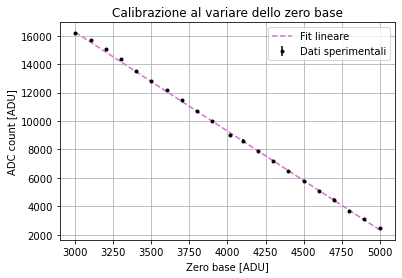

In [15]:
popt, pcov = curve_fit(linear, zb, count,sigma=s_count,absolute_sigma=False)
m=popt[0]
q=popt[1]
perr = np.sqrt(np.diag(pcov))
sm=perr[0]
sq=perr[1]
plt.plot(zb,zb*m+q,'--',label='Fit lineare',color="orchid")
plt.errorbar(zb,count,yerr=s_count,fmt='.',label='Dati sperimentali',color="black")
plt.xlabel('Zero base [ADU]')
plt.ylabel('ADC count [ADU]')
plt.title('Calibrazione al variare dello zero base')
plt.legend()
print("m:",m,sm)
print("q:",q,sq)
plt.grid()
plt.show()

$A = -\dfrac{m}{G\cdot gain}$

In [16]:
gain = 8
G = 20
A = - m / (G*gain)
sigma_A = 1/(G*gain) * sm

## Calibration at zero base = 4890

In [17]:
g1 = np.loadtxt("g2.txt", usecols = 2, unpack = True, skiprows=10)
g2 = np.loadtxt("g3.txt", usecols = 2, unpack = True, skiprows=10)
g3 = np.loadtxt("g4.txt", usecols = 2, unpack = True, skiprows=10)
g4 = np.loadtxt("g5.txt", usecols = 2, unpack = True, skiprows=10)
g5 = np.loadtxt("g6.txt", usecols = 2, unpack = True, skiprows=11)
g6 = np.loadtxt("g7.txt", usecols = 2, unpack = True, skiprows=10)
g7 = np.loadtxt("g8.txt", usecols = 2, unpack = True, skiprows=10)
g8 = np.loadtxt("g9_zb4890.txt", usecols = 2, unpack = True, skiprows=10)

In [18]:
count2 = np.array([np.mean(g1), np.mean(g2), np.mean(g3), np.mean(g4), np.mean(g5), np.mean(g6), np.mean(g7), np.mean(g8)])
gain = np.array([2.27, 2.67, 3.2, 4, 5.33, 8, 16, 24])
s_count2 = np.array([np.std(g1, ddof=1), np.std(g2, ddof=1), np.std(g3, ddof=1), np.std(g4, ddof=1), np.std(g5, ddof=1), np.std(g6, ddof=1), np.std(g7, ddof=1), np.std(g8, ddof=1)])

m: 378.00793685716 2.1410852578850266
q: 95.47204550994525 8.964365043397663


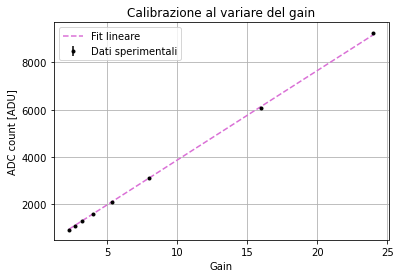

In [19]:
popt, pcov = curve_fit(linear, gain, count2,sigma=s_count2,absolute_sigma=False)
m=popt[0]
q=popt[1]
perr = np.sqrt(np.diag(pcov))
sm=perr[0]
sq=perr[1]
plt.plot(gain,gain*m+q,'--',label='Fit lineare',color="orchid")
plt.errorbar(gain,count2,yerr=s_count2,fmt='.',label='Dati sperimentali',color="black")
plt.xlabel('Gain')
plt.ylabel('ADC count [ADU]')
plt.title('Calibrazione al variare del gain')
plt.legend()
print("m:",m,sm)
print("q:",q,sq)
plt.grid()
plt.show()

In [20]:
Voff = q
s_Voff = sq

# Physical calibration: $T_{hot}$ and $T_{cold}$

In [21]:
gain2 = np.array([2.67, 4, 5.33, 8])
zb_hot = np.array([6450, 7680, 8300, 8910])
zb_cold = np.array([3710, 4840, 5340, 5900])

In [22]:
Sh3 = np.loadtxt("t_amb-gain3.txt", usecols = 2, unpack = True, skiprows=10)
Sh5 = np.loadtxt("t_amb-gain5.txt", usecols = 2, unpack = True, skiprows=10)
Sh6 = np.loadtxt("tamb_gain6.txt", usecols = 2, unpack = True, skiprows=10)
Sh7 = np.loadtxt("t_amb-gain7.txt", usecols = 2, unpack = True, skiprows=10)
Sc3 = np.loadtxt("t_cold_g3.txt", usecols = 2, unpack = True, skiprows=10) 
Sc5 = np.loadtxt("t_cold_g5.txt", usecols = 2, unpack = True, skiprows=10) 
Sc6 = np.loadtxt("t_cold_gain6.txt", usecols = 2, unpack = True, skiprows=10) 
Sc7 = np.loadtxt("t_cold_gain7.txt", usecols = 2, unpack = True, skiprows=11) 

s_S_hot = np.array([Sh3.std()/(len(Sh3))**0.5,Sh5.std()/(len(Sh5))**0.5,Sh6.std()/(len(Sh6))**0.5,Sh7.std()/(len(Sh7))**0.5])
s_S_cold = np.array([Sc3.std()/(len(Sc3))**0.5,Sc5.std()/(len(Sc5))**0.5,Sc6.std()/(len(Sc6))**0.5,Sc7.std()/(len(Sc7))**0.5])


In [23]:
Sh3 = (np.loadtxt("t_amb-gain3.txt", usecols = 2, unpack = True, skiprows=10) - Voff + G * gain2[0] * A * zb_hot[0]) / ( (1+G)*gain2[0] )
Sh5 = (np.loadtxt("t_amb-gain5.txt", usecols = 2, unpack = True, skiprows=10) - Voff + G * gain2[1] * A * zb_hot[1]) / ( (1+G)*gain2[1] )
Sh6 = (np.loadtxt("tamb_gain6.txt", usecols = 2, unpack = True, skiprows=10) - Voff + G * gain2[2] * A * zb_hot[2]) / ( (1+G)*gain2[2] )
Sh7 = (np.loadtxt("t_amb-gain7.txt", usecols = 2, unpack = True, skiprows=10) - Voff + G * gain2[3] * A * zb_hot[3]) / ( (1+G)*gain2[3] )
Sc3 = (np.loadtxt("t_cold_g3.txt", usecols = 2, unpack = True, skiprows=10) - Voff + G * gain2[0] * A * zb_cold[0]) / ( (1+G)*gain2[0] )
Sc5 = (np.loadtxt("t_cold_g5.txt", usecols = 2, unpack = True, skiprows=10) - Voff + G * gain2[1] * A * zb_cold[1]) / ( (1+G)*gain2[1] )
Sc6 = (np.loadtxt("t_cold_gain6.txt", usecols = 2, unpack = True, skiprows=10) - Voff + G * gain2[2] * A * zb_cold[2]) / ( (1+G)*gain2[2] )
Sc7 = (np.loadtxt("t_cold_gain7.txt", usecols = 2, unpack = True, skiprows=11) - Voff + G * gain2[3] * A * zb_cold[3]) / ( (1+G)*gain2[3] )


In [24]:
S_hot = np.array([Sh3.mean(),Sh5.mean(),Sh6.mean(),Sh7.mean()])
S_cold = np.array([Sc3.mean(),Sc5.mean(),Sc6.mean(),Sc7.mean()])

In [25]:
T_h = np.loadtxt("temperature.txt", usecols = 0, unpack = True)
T_hot = T_h.mean() + 273.15
s_T_hot = T_h.std()

In [26]:
T_cold = 77 
s_T_cold = 1

In [27]:
den = 0
num = 0
for i in range(0,3):
    num += S_cold[i]/(s_S_cold[i]*s_S_cold[i])
    den += 1/(s_S_cold[i]*s_S_cold[i])

S_cold_medio = num/den
print(S_cold_medio, den)
print(s_S_cold.mean())

292.301888814918 0.4758141679914265
2.8061619834757052


In [28]:
den = 0
num = 0
for i in range(0,3):
    num += S_hot[i]/(s_S_hot[i]*s_S_hot[i])
    den += 1/(s_S_hot[i]*s_S_hot[i])

S_hot_medio = num/den

print(S_hot_medio, den)
print(s_S_hot.mean())

416.49853176229294 10.887490619653978
1.1540367755277932


In [29]:
C = (S_hot_medio - S_cold_medio)/(T_hot - T_cold)
s_C = C * ( (s_S_hot.mean() + s_S_cold.mean())/(S_hot_medio-S_cold_medio)  + (s_T_hot+ s_T_cold)/(T_hot-T_cold) )


In [30]:
#system temperature
T_sys = S_hot_medio/C - T_hot
s_T_sys = s_T_hot.mean() + (S_hot_medio/C) * (s_C/C + s_S_hot.mean()/S_hot.mean())

# Secant law

In [31]:
T_loss = 13
T_spill = 6
G = 20
az = np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]) 

In [32]:
secanti = np.zeros(18)

for a in range(1,18):
    secanti[17-(a-1)] = 1/mt.cos(mt.radians(a*5))

x = secanti


##### Gain = 2.67

In [33]:
zb_3 = 3930
gain_3 = 2.67

In [34]:
s3_in = np.loadtxt("Scan gain 3 (rifatto).txt", usecols = 2, unpack = True, skiprows=113)
s3 = (s3_in-Voff + G * gain_3 * A * zb_3) / ( (1+G) * gain_3 ) #S_Sky

[248.55176919 239.32401816 234.1126752  230.55462276 227.79022112
 226.18865166 225.19168358 224.69587477 224.1947155  223.8166167
 225.02225251 225.65538966 224.15904581 224.73332795 225.32187798
 225.43245405 226.30636166 228.62489207]


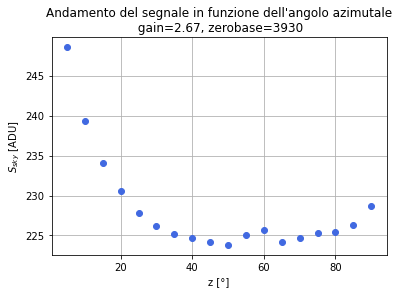

In [35]:
a = 0
mean3 = np.zeros(len(az))
std3 = np.zeros(len(az))
for n in range(0, len(mean3)):
    std3[n] = s3[a:a+10].std()
    mean3[n] = s3[a:a+10].mean()
    a = a+17
print(mean3)
plt.plot(az, mean3, 'o', color = 'royalblue') 
plt.xlabel('z [°]')
plt.grid()

plt.ylabel('$S_{sky}$ [ADU]')
plt.title("Andamento del segnale in funzione dell'angolo azimutale\n gain=2.67, zerobase=3930")
plt.show()

Linearization: $x = \frac{1}{cos(az)}$ e $y = \frac{S_{sky}}{C}$, where $S_{sky} = \frac{S-V_{off}+ G \cdot gain \cdot A \cdot Z_b}{(1+G)\cdot gain}$

In [36]:
zb_3 = 3930
G = 20
gain_3 = 2.67

y3 = mean3 / C
s_y3 = (std3 + s_Voff + (G * gain_3 * zb_3) * sigma_A) / ( (1+G)*gain_3 )

m: 4.2373731199598765 0.15031910189165568
q: 383.36768224259316 0.4545530335796142


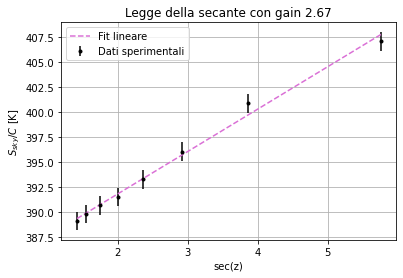

In [37]:
popt, pcov = curve_fit(linear, x[2:10], y3[2:10],sigma=s_y3[2:10],absolute_sigma=False)
m=popt[0]
q=popt[1]
perr = np.sqrt(np.diag(pcov))
sm=perr[0]
sq=perr[1]
plt.plot(x[2:10],x[2:10]*m+q,'--',label='Fit lineare',color="orchid")
plt.errorbar(x[2:10],y3[2:10], yerr=s_y3[2:10],fmt='.',label='Dati sperimentali',color="black")
plt.xlabel('sec(z)')
plt.ylabel('$S_{sky}/C$ [K]')
plt.title('Legge della secante con gain 2.67')
plt.legend()
print("m:",m,sm)
print("q:",q,sq)
plt.grid()
plt.show()

In [38]:
#T_CMB
Tcmb = q - (T_sys + T_loss + T_spill)
sigma_Tcmb = sq + s_T_sys

Reapting this method for every gain we will obtain others estimates of the Cosmic Microwave Background temperature. A weighted average can be produced.